In [6]:
!pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [9]:
os.chdir("C:/Users/agnes/Documents/EAGLE/Innovation_Lab/Daten")

In [13]:
# 1. CSV-Datei laden
csv_path = "Gemeinsamer_Bundesausschluss/processed/Qualitaetsbericht_KRS_i71_23.csv"
df_csv = pd.read_csv(csv_path, dtype={'AGS': str, 'ARS': str, 'PLZ': str})
df_csv

,AGS,ARS,GF,GEN,BEZ,Datei,Name,IK,PLZ,Ort,...,I71.06,I71.07,I71.1,I71.2,I71.3,I71.4,I71.5,I71.6,I71.8,I71.9
0,01001,01001,4.0,Flensburg,Kreisfreie Stadt,260100023-773287000-2023-xml.xml,DIAKO Klinikum,260100023,24939,Flensburg,...,0.0,0.0,NaN,NaN,NaN,48.0,0.0,0.0,0.0,0.0
1,01053,01053,4.0,Herzogtum Lauenburg,Kreis,260100432-772342000-2023-xml.xml,Johanniter-Krankenhaus Geesthacht (KH),260100432,21502,Geesthacht,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01053,01053,4.0,Herzogtum Lauenburg,Kreis,260100432-772342000-2023-xml.xml,Johanniter-Krankenhaus Geesthacht (KH),260100432,21502,Geesthacht,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01054,01054,4.0,Nordfriesland,Kreis,260100476-772465000-2023-xml.xml,Klinikum Nordfriesland gGmbH,260100476,25813,Husum,...,0.0,NaN,0.0,NaN,NaN,17.0,NaN,NaN,0.0,0.0
4,01055,01055,4.0,Ostholstein,Kreis,260100626-773006000-2023-xml.xml,AMEOS Krankenhausgesellschaft Ostholstein mbH,260100626,23730,Neustadt in Holstein,...,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,16051,16051,4.0,Erfurt,Kreisfreie Stadt,261601021-771835000-2023-xml.xml,HELIOS Klinikum Erfurt,261601021,99089,Erfurt,...,0.0,0.0,0.0,0.0,NaN,76.0,0.0,7.0,0.0,0.0
539,NaN,16056,NaN,NaN,NaN,261601123-772308000-2023-xml.xml,St. Georg Klinikum Eisenach gemeinnützige GmbH,261601123,99817,Eisenach,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540,16070,16070,4.0,Ilm-Kreis,Landkreis,261601203-773583000-2023-xml.xml,Ilm-Kreis-Kliniken Arnstadt-Ilmenau gGmbH - St...,261601203,98693,Ilmenau,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541,16070,16070,4.0,Ilm-Kreis,Landkreis,261601203-773594000-2023-xml.xml,Ilm-Kreis-Kliniken\nArnstadt-Ilmenau gGmbH,261601203,99310,Arnstadt,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


In [15]:
# 1. Shapefile laden
shapefile_path = "C:/Users/agnes/Documents/EAGLE/Innovation_Lab/Daten/Verwaltungsgebiete/vg250_12-31.gk3.shape.ebenen/vg250_ebenen_1231/VG250_KRS.shp"
gdf_shp  = gpd.read_file(shapefile_path, dtype={'AGS': str, 'ARS': str})

In [17]:
# 3. Anzahl der Vorkommen je ARS in der CSV-Datei zählen
ars_counts = df_csv['ARS'].value_counts().reset_index()
ars_counts.columns = ['ARS', 'Anzahl']
ars_counts

,ARS,Anzahl
0,11000,18
1,08311,11
2,02000,11
3,05112,8
4,09162,8
...,...,...
280,08119,1
281,08135,1
282,08128,1
283,08216,1


In [18]:
# 4. Sicherstellen, dass "ARS" Spalte in beiden DataFrames als string vorliegt
ars_counts['ARS'] = ars_counts['ARS'].astype(str)
gdf_shp['ARS'] = gdf_shp['ARS'].astype(str)



In [21]:
# 5. Join der Daten
gdf_merged = gdf_shp.merge(ars_counts, on='ARS', how='left')

# 6. Fehlende Werte mit 0 ersetzen
gdf_merged['Gefaesschirurgische_Fachabteilungen'] = gdf_merged['Anzahl'].fillna(0)
gdf_merged

,OBJID,BEGINN,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,...,SN_G,FK_S3,NUTS,ARS_0,AGS_0,WSK,DLM_ID,geometry,Anzahl,Gefaesschirurgische_Fachabteilungen
0,DEBKGVG200000C75,2022-12-20,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,...,000,R,DEF01,010010000000,01001000,2008-01-01,DEBKGDL20000002R,"POLYGON ((3526591.850 6077123.907, 3526626.055...",1.0,1.0
1,DEBKGVG200000C76,2022-12-20,4,4,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,...,000,R,DEF02,010020000000,01002000,2006-01-01,DEBKGDL20000E43X,"POLYGON ((3575940.276 6034122.503, 3575968.387...",NaN,0.0
2,DEBKGVG200000C77,2023-10-04,4,4,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,...,000,R,DEF03,010030000000,01003000,2006-02-01,DEBKGDL20000DYM9,"POLYGON ((3623175.007 5985702.682, 3623310.494...",2.0,2.0
3,DEBKGVG200000C78,2022-12-20,4,4,1,01004,01004,010040000000,Neumünster,Kreisfreie Stadt,...,000,R,DEF04,010040000000,01004000,1970-04-26,DEBKGDL20000E4KX,"POLYGON ((3565110.702 6002599.225, 3565223.516...",1.0,1.0
4,DEBKGVG200000C79,2023-10-04,4,4,1,01051,01051,010510044044,Dithmarschen,Kreis,...,000,R,DEF05,010510000000,01051000,2011-08-01,DEBKGDL20000E14G,"MULTIPOLYGON (((3479734.380 5992192.193, 34798...",1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,DEBKGVG200000CIY,2023-10-04,4,2,1,13003,13003,130030000000,Rostock,Kreisfreie Stadt,...,000,R,DE803,130030000000,13003000,2007-01-01,DEBKGDL20000003J,"MULTIPOLYGON (((3702699.608 6009970.562, 37026...",2.0,2.0
429,DEBKGVG200000CIZ,2023-10-04,4,2,1,13072,13072,130720043043,Rostock,Landkreis,...,000,R,DE80K,130720000000,13072000,2011-09-04,DEBKGDL20000SRLP,"MULTIPOLYGON (((3671095.862 5999947.646, 36709...",2.0,2.0
430,DEBKGVG200000CJ0,2023-10-04,4,2,1,13073,13073,130730088088,Vorpommern-Rügen,Landkreis,...,000,R,DE80L,130730000000,13073000,2011-09-04,DEBKGDL20000QGFU,"MULTIPOLYGON (((3728477.432 6043719.851, 37284...",1.0,1.0
431,DEBKGVG200000CJ1,2023-10-04,4,2,1,13074,13074,130740087087,Nordwestmecklenburg,Landkreis,...,000,R,DE80M,130740000000,13074000,2011-09-04,DEBKGDL20000QGFR,"MULTIPOLYGON (((3654275.492 5982121.864, 36541...",3.0,3.0


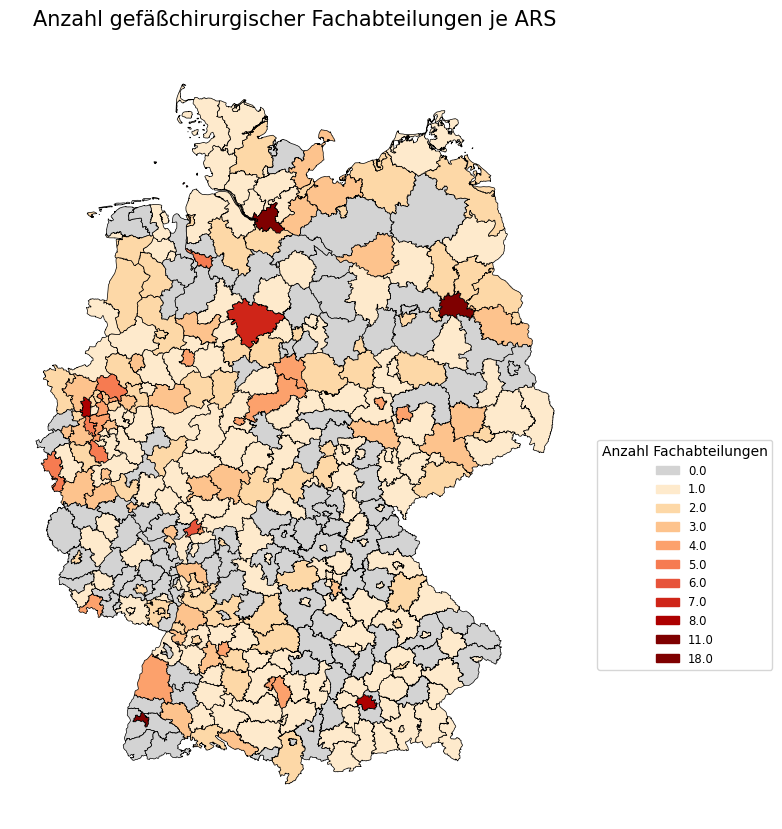

In [34]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import numpy as np

# Werte sortieren
values = sorted(gdf_merged['Gefaesschirurgische_Fachabteilungen'].unique())

# Colormap erstellen
cmap_base = plt.get_cmap('OrRd', len([v for v in values if v > 0]))
colors = ['lightgrey'] + [cmap_base(i) for i in range(1, len(values))]

# Diskrete Colormap + Norm
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(boundaries=np.arange(len(values)+1), ncolors=len(values))

# Plot erstellen
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
gdf_merged.plot(
    column='Gefaesschirurgische_Fachabteilungen',
    cmap=cmap,
    norm=norm,
    linewidth=0.5,
    edgecolor='black',
    ax=ax
)

# Manuelle Legende erstellen
legend_patches = [
    mpatches.Patch(color=colors[i], label=f"{values[i]}")
    for i in range(len(values))
]

ax.legend(
    handles=legend_patches,
    title='Anzahl Fachabteilungen',
    loc='upper left',
    bbox_to_anchor=(1.02, 0.5),
    fontsize='small',
    title_fontsize='medium',
    frameon=True
)

# Titel & Achsen
ax.set_title("Anzahl gefäßchirurgischer Fachabteilungen je ARS", fontsize=15)
plt.axis('off')
plt.savefig("Gemeinsamer_Bundesausschluss/processed/karte_fachabteilungen.png", dpi=300, bbox_inches='tight')

plt.show()
# Karte als PNG-Datei speichern

